<a href="https://colab.research.google.com/github/melissajblins/jogo-da-forca/blob/main/Jogo_da_Forca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linguagens Formais e Autômatos [2024.Q1] - Jogo da Forca com autômatos finitos não determinísticos

*   Professor Alexandre Donizeti Alves
*   Aluna: Melissa Junqueira de Barros Lins, 11201920583
*   Universidade Federal do ABC

- Referências:
  - https://ijic.utm.my/index.php/ijic/article/view/275
  - https://github.com/Fikretatr/Cse422Project/blob/main/hangman.jl
  - https://www.youtube.com/watch?v=EpdCHX96lkY

- Autômato:

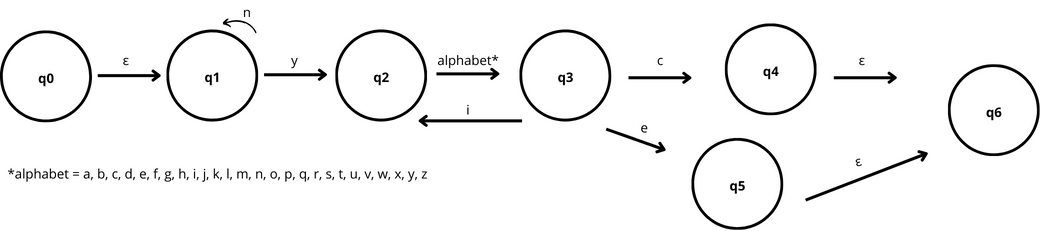

## Bibliotecas

In [1]:
import random # escolher aleatoriamente a palavra
import string # manipulação de strings

## Código

### Desenhos

In [2]:
# cabeçalho
def inicio():
      print("""
          ++++++++++     Jogo da Forca     ++++++++++
        """)

In [3]:
# inicio
def vidas6():
  print("""
            +------------------------------+
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            ___|___
            """)

In [4]:
# 1 erro
def vidas5():
  print("""
            +------------------------------+
            |
            |
            |                          ---------
            |                          | ^   ^ |
            |                          |   .   |
            |                          |  ---  |
            |                          ---------
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            ___|___
            """)

In [5]:
# 2 erros
def vidas4():
   print("""
            +------------------------------+
            |
            |
            |                          ---------
            |                          | ^   ^ |
            |                          |   .   |
            |                          |  ---  |
            |                          ---------
            |                              |
            |                              |
            |                              |
            |                              |
            |                              |
            |                              |
            |                              |
            |                              |
            |                              |
            |
            |
            |
            |
            ___|___
            """)

In [6]:
# 3 erros
def vidas3():
              print("""
            +------------------------------+
            |
            |
            |                          ---------
            |                          | ^   ^ |
            |                          |   .   |
            |                          |  ---  |
            |                          ---------
            |                              |
            |                             /|
            |                            / |
            |                           /  |
            |                          /   |
            |                              |
            |                              |
            |                              |
            |                              |
            |
            |
            |
            |
            ___|___
            """)

In [7]:
# 4 erros
def vidas2():
              print("""
            +------------------------------+
            |
            |
            |                          ---------
            |                          | ^   ^ |
            |                          |   .   |
            |                          |  ---  |
            |                          ---------
            |                              |
            |                             /|\\
            |                            / | \\
            |                           /  |  \\
            |                          /   |   \\
            |                              |
            |                              |
            |                              |
            |                              |
            |
            |
            |
            |
            ___|___
            """)

In [8]:
# 5 erros
def vidas1():
              print("""
            +------------------------------+
            |
            |
            |                          ---------
            |                          | -   - |
            |                          |   .   |
            |                          |  (~)  |
            |                          ---------
            |                              |
            |                             /|\\
            |                            / | \\
            |                           /  |  \\
            |                          /   |   \\
            |                             /
            |                            /
            |                           /
            |                          /
            |
            |
            |
            |
            ___|___
            """)

In [9]:
# jogador adivinha a palavra
def ganhou():
          print("""
            +------------------------------+
            |
            |
            |                         /-\\
            |                        /   \\
            |                       /     \\
            |                      ---------
            |           ---------
            |      _    | ^   ^ |    _
            |      |    |   .   |    |
            |      \    | [___] |    /
            |       \   ---------   /
            |        \      |      /
            |         \-----|-----/
            |               |
            |               |
            |               |
            |              / \\
            |             /   \\
            |            /     \\
            |           /       \\
            ___|___     /         \\    __
        """)

In [10]:
# jogador erra 6 vezes
def perdeu():
          print("""
            +------------------------------+
            |
            |
            |                          ---------
            |                          | x   x |
            |                          |   .   |
            |                          |   O   |
            |                          ---------
            |                       -------|-------
            |                             /|\\
            |                            / | \\
            |                           /  |  \\
            |                          /   |   \\
            |                             / \\
            |                            /   \\
            |                           /     \\
            |                          /       \\
            |                         /         \\
            |
            |
            |
            |
            ___|___
        """)

### Categorias e Palavras

In [11]:
animals = ["ant", "bear", "cat", "dog", "elephant", "frog", "giraffe", "horse", "iguana", "jaguar", "kangaroo", "lion", "monkey", "newt", "owl", "penguin", "quokka", "rabbit", "snake", "tiger", "unicorn", "vulture", "whale", "xerus", "yak", "zebra"]
fruits = ["apples", "apricots", "avocados", "cherries", "elderberry", "eggfruit", "kiwi", "olive", "oranges", "papaya", "peach", "pomegranate", "pineapple", "tomato", "tangerine", "zucchini"]
brands = ["nike", "amazon", "apple", "netflix", "google", "spotify", "nintendo", "microsoft", "instagram", "tesla", "linkedin", "playstation", "starbucks", "honda", "mercedes", "adobe", "logitech", "adidas"]

categories = {
    "animals": animals,
    "fruits": fruits,
    "brands": brands
}

### Funções auxiliares

In [12]:
def load_wordlist(words):
    return words

# cria automatos
def create_hangman_automaton(alphabet, transitions, states, initial_state, accepting_states):
    automaton = {
        "alphabet": alphabet,
        "states": states,
        "initial_state": initial_state,
        "accepting_states": accepting_states,
        "transitions": transitions
    }
    return automaton

### Definindo autômato

In [13]:
alphabet = list(string.ascii_lowercase)

transitions = {
        ('q0', ''): 'q1',
        ('q1', 'n'): 'q1',
        ('q1', 'y'): 'q2',
}
for letter in alphabet:
  transitions[('q2', letter)] = 'q3'
transitions.update({
        ('q3', 'c'): 'q4',
        ('q3', 'i'): 'q2',
        ('q3', 'e'): 'q5',
        ('q4', ''): 'q6',
        ('q5', ''): 'q6'
})

states = ["q0", "q1", "q2", "q3", "q4", "q5", "q6"]
initial_state = 'q0'
accepting_states = ["q6"]

### Principal

In [14]:
def play_hangman():
    errors = 0 # quantidade de erros
    guessed_letters = set() # conjunto de letras inseridas pelo usuario
    word = ""
    category_name = ""

    automaton = create_hangman_automaton(alphabet, transitions, states, initial_state, accepting_states) # criacao do automato
    current_state = automaton['initial_state']
    current_state = automaton['transitions'][current_state, '']

    while current_state == "q1":
      category_name = input("Choose a category (Animals, Fruits, Brands): ").strip().capitalize().lower()
      if category_name not in categories:
        current_state = automaton['transitions'][current_state, 'n'] # categoria invalida
      else:
        current_state = automaton['transitions'][current_state, 'y'] # categoria aceita

    wordlist = load_wordlist(categories[category_name]) # escolha de uma categoria
    word = random.choice(wordlist) # escolha de uma palavra

    inicio() # cabeçalho
    vidas6() # inicio do jogo

    while current_state not in automaton['accepting_states']: # enquanto nao esta no estado final
      print("\n")
      print("Word:", ''.join(letter if letter in guessed_letters else ' _ ' for letter in word)) # imprime palavra

      letter = input("Guess a letter: ").lower()
      if len(letter) != 1 or not letter.isalpha():
          print("Invalid input! Please guess a single letter.") # erro: quando inserido duas letras ou mais ou um número
          continue
      elif letter in guessed_letters:
          print("You already guessed that letter!") # letra que ja foi inserida
          continue
      else:
          guessed_letters.add(letter)


      current_state = automaton['transitions'][current_state, letter]

      if current_state == 'q3':
        if letter in word:
          if all(letter in guessed_letters for letter in word):
              current_state = automaton['transitions'][current_state, 'c'] # caso palavra esteja completa
          else:
              current_state = automaton['transitions'][current_state, 'i'] # caso palavra esteja incompleta
        else:
          errors += 1 # quando erros sao cometidos
          print('Quantidade de erros: ' + str(errors))
          if (errors) == 1:
            vidas5()
          elif (errors) == 2:
            vidas4()
          elif (errors) == 3:
            vidas3()
          elif (errors) == 4:
            vidas2()
          elif (errors) == 5:
            vidas1()
          if (errors == 6):
            current_state = automaton['transitions'][current_state, 'e'] # quando 6 erros sao cometidos
          else:
            current_state = automaton['transitions'][current_state, 'i'] # quando a palavra esta incompleta


      if current_state == 'q4': # vitoria
        print("\nVocê venceu!  :)")
        print("A palavra é: " + word)
        ganhou()
        current_state = automaton['transitions'][current_state, '']
      if current_state == 'q5': # derrota
        print("\nVocê perdeu!  :(")
        print("A palavra era: " + word)
        perdeu()
        current_state = automaton['transitions'][current_state, '']

if __name__ == "__main__":
    play_hangman()

Choose a category (Animals, Fruits, Brands): a
Choose a category (Animals, Fruits, Brands): animals

          ++++++++++     Jogo da Forca     ++++++++++
        

            +------------------------------+
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            ___|___
            


Word:  _  _  _ 
Guess a letter: a
Quantidade de erros: 1

            +------------------------------+
            |
            |
            |                          ---------
            |                          | ^   ^ |
            |                          |   .   |
            |                          |  ---  |
            |                          ---------
            |
            |
            |
            |
            |
            |
 

### Automathon

In [15]:
!pip install automathon --upgrade

  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3


In [16]:
from automathon import NFA

# automato modelado com a biblioteca automathon
q = {'q0', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6'}
sigma = {'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'}
delta = {
    'q0': {'': {'q1'}},
    'q1': {
        'n': {'q1'},
        'y': {'q2'}
    },
    'q2': {
        'a': {'q3'},
        'b': {'q3'},
        'c': {'q3'},
        'd': {'q3'},
        'e': {'q3'},
        'f': {'q3'},
        'g': {'q3'},
        'h': {'q3'},
        'i': {'q3'},
        'j': {'q3'},
        'k': {'q3'},
        'l': {'q3'},
        'm': {'q3'},
        'n': {'q3'},
        'o': {'q3'},
        'p': {'q3'},
        'q': {'q3'},
        'r': {'q3'},
        's': {'q3'},
        't': {'q3'},
        'u': {'q3'},
        'v': {'q3'},
        'w': {'q3'},
        'x': {'q3'},
        'y': {'q3'},
        'z': {'q3'}
    },
    'q3': {
        'c': {'q4'},
        'e': {'q5'},
        'i': {'q2'},
    },
    'q4': {'': {'q6'}},
    'q5': {'': {'q6'}},
}
initial_state = 'q0'
f = {'q6'}

automata = NFA(q, sigma, delta, initial_state, f)

In [17]:
automata.is_valid() # automato eh valido

True

In [18]:
automata.contains_epsilon_transitions() # automato possui transicoes vazias

True